Objective:Hi! Welcome. The data comes from 'Medical Cost Personal Datasets'. 
Here, I am interested in finding any correlation of medical charges with features listed in the given dataset and i excited to see the results.



In [2]:
import os
cwd=os.getcwd()
print(cwd)

C:\Users\sharathm\Desktop\projects\medicine cost predection


Lets begin!
We start our analysis by importing necessary modules

In [3]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sea
pd.set_option('display.max_columns', 500)
data=pd.read_csv("insurance.csv")
import warnings
warnings.filterwarnings('ignore')


Lets do some exploratory data analysis. Here I check a subset of data by the head method and check if there is any missing data
using the info method. The columns are- age, sex, bmi, children, region, charges.

1.'Age'- age of the insured (primary beneficiery).

2.'Sex'- Gender of the beneficiery.

3.'BMI' is body mass index which is obtained by dividing weight in kilograms with the square
   of height in meters.
   
4.'Region'- means residence of the beneficiery in any of the 4 US regions- northeast, southeast, southwest,
   northwest.
   
5.'Children' - Number of kids of the primary beneficiery. 

6.'Smoker' - if the person smokes or not. 'Charges' include the
   medical charges.

In [5]:
# here i saw the 10 data rows, if do not mention the required count then python gives 5 data rows automatically
print(data.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [6]:
# i check the data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [7]:
# check missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

be cool! we seems we have no missing values in this dataset.

Next, I check the statistics for the available data.like ranges of varibles and mean,mode,quartiles

In [8]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


This time for checking relation between charges and remaing indepedent varibles by usin different types of plots.
in my mind i have a thought of how the charges are influenced by age. so let we check.

Text(0.5,1,'Effect of Age on Charges')

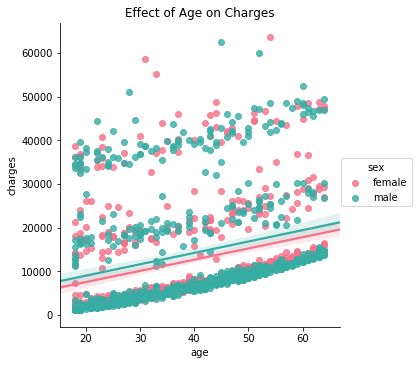

In [13]:
sea.lmplot(x='age', y='charges', hue= 'sex', data=data, palette='husl')
plt.title('Effect of Age on Charges')

As, gender specific pattern is not clearly distinguishable in the plot above. I plot separately, for 'sex'. As above, similar
pattern is observed.

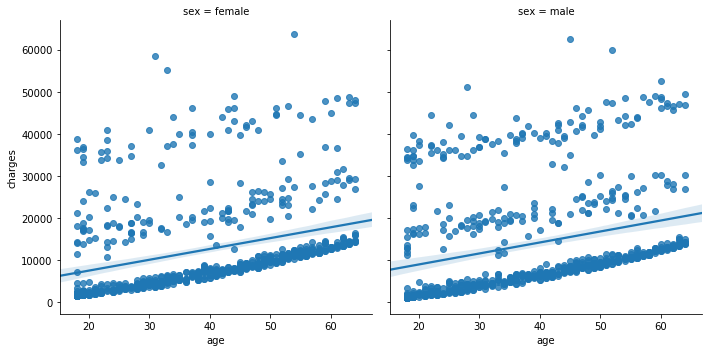

In [15]:
sea.lmplot(x='age', y='charges', col='sex',data=data, palette='husl')

From the pattern observed in the plot below, I decide to include one of our obvious features- that can determine medical charges-
'Smoking'. As can be seen here that with increasing age, smokers show bigger increase in the medical charges compared to 
non-smokers. It seems that age and smoking are showing a synergistic relationship , as with increasing age, smokers show higher
charges compared to non-smokers.

Text(0.5,1,'Combined effect of Age and Smoking on Charges')

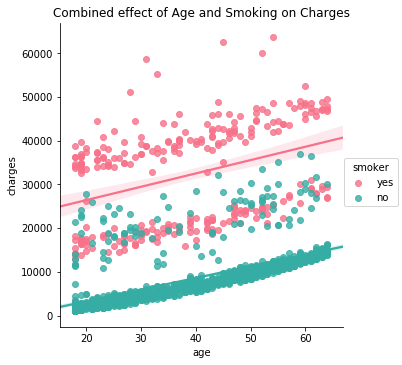

In [19]:
sea.lmplot(x='age', y='charges', hue='smoker', data=data, palette='husl')
plt.title('Combined effect of Age and Smoking on Charges')

Next, I try to check the relationship between charges and age as a function of smokers/non-smokers separately for the two
genders. As can be seen from the lmplot below, there are lower charges for non-smokers compared to smokers with increasing age 
for both the genders.

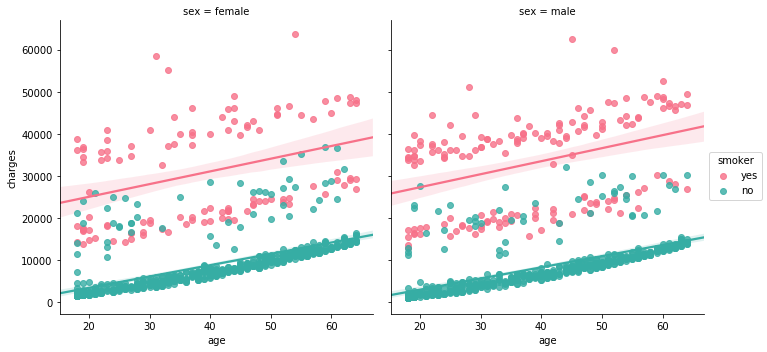

In [21]:
sea.lmplot(x='age', y='charges', hue='smoker', col='sex',data=data, palette='husl')

This relationship between smoker/non-smoker vs charges for both the genders become more clear from the violin plot shown below. 
With both the genders showing that for most of the non smokers the charges are below $20,000, while its higher for most of the 
smokers.

Text(0.5,1,'Effect of Smoking on Charges of males and females')

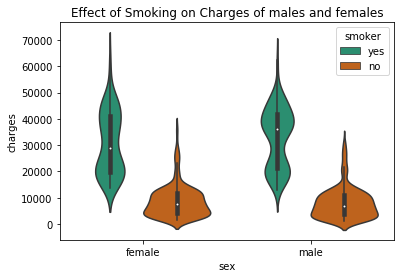

In [22]:
sea.violinplot(x="sex", y='charges', hue="smoker", data=data, palette='Dark2')
plt.title('Effect of Smoking on Charges of males and females')

Also, I am interested in checking the number of smokers/non-smokers males and females as well as the mean charges for them. 
The data contains non-smokers 547 females and 517 males while there are 115 smokers females and 159 smokers males. The mean
charges are 8762; 8087; 30678 and 33042 for non-smoker females, males, smoker females, males, respectively. The distribution
can be seen in the following two bar-plots.

In [68]:
data_grouped=data.groupby(['smoker', 'sex']).agg({'charges':'sum','sex':'count'})
data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped=data_grouped.rename(columns={'sex':'number_in_gender'})
data_grouped.index=[0,1,2,3]
data_grouped['smoker']=['no','no','yes','yes']
data_grouped['sex']=['female','male','female','male']
data_grouped=data_grouped[['smoker', 'sex','number_in_gender','charges','mean_charges']]
data_grouped

,smoker,sex,number_in_gender,charges,mean_charges
0,no,female,547,4.792977e+06,8762.297300
1,no,male,517,4.181085e+06,8087.204731
2,yes,female,115,3.528085e+06,30678.996276
3,yes,male,159,5.253679e+06,33042.005975


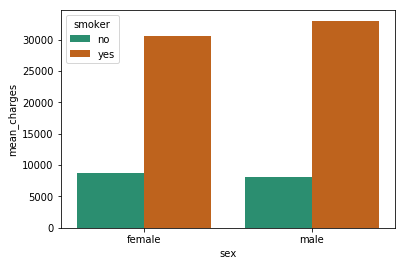

In [82]:
sea.barplot(x='sex',y='mean_charges',hue='smoker',data=data_grouped, palette='Dark2')

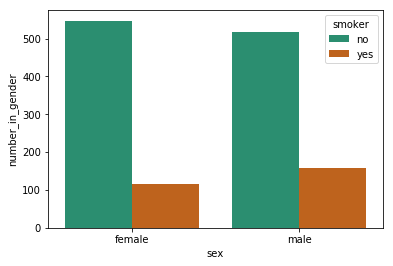

In [81]:
sea.barplot(x='sex',y='number_in_gender',hue='smoker',data=data_grouped, palette='Dark2')

Next, lets check if BMI has any influence on the medical charges.
BMI Weight Status
Below 18.5 Underweight
18.5 – 24.9 Normal
25.0 – 29.9 Overweight
30.0 and Above Obese
Note: the above data is collected from outer source
Therefore, so i interested to check correlation between chages ans IBM

Although, in the first scatterplot (shown below) the influence of BMI on charges is not clearly visible. But, BMI's influence
on medical charges become clear when I involve 'smoker' feature (second scatterplot shown below). It shows that increasing BMI 
combined with smoking leads to higher charges compared to non-smoker with a higher BMI. This indicates, a probable synergistic
relationship between smoking and BMI.

Text(0.5,1,'Effect of BMI on Charges')

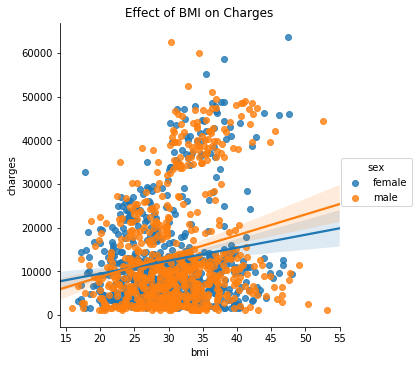

In [90]:
sea.lmplot(x='bmi',y='charges',hue='sex',data=data)
plt.title('Effect of BMI on Charges')

As indicated in the scatter plot below, obesity combined with smoking can lead to higher medical expenses

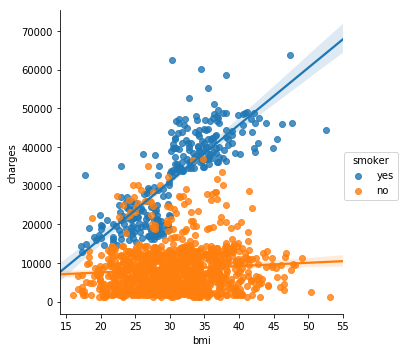

In [112]:
sea.lmplot(x='bmi',y='charges',hue='smoker',data=data)

Here, I check the combined influence of BMI and smoking on genders separately. Both males and females show similar influence of 
smoking and BMI. Smoking combined with an increasing BMI leads to increase in medical charges.

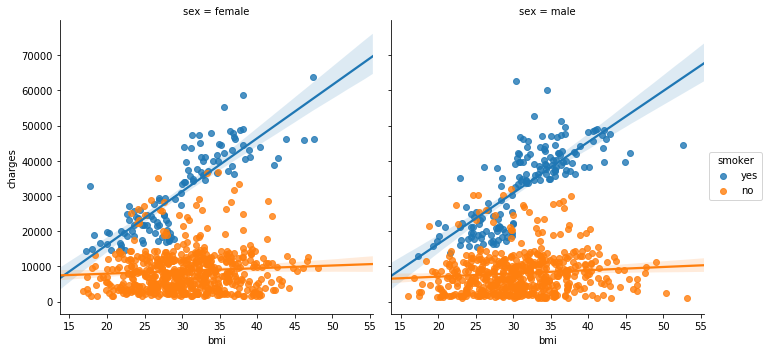

In [113]:
sea.lmplot(x='bmi',y='charges',hue='smoker', col='sex',data=data)

In order to find any correlation between the features, I check the paiplot (Shown below). One of the peculiar observations is  
that parents of 5 kids are incurring lesser medical expenses

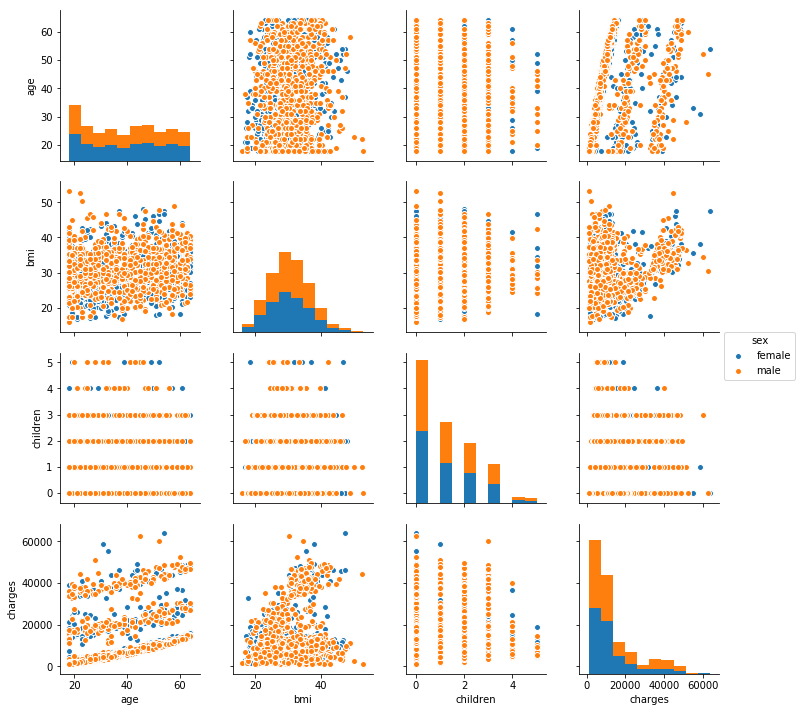

In [114]:
sea.pairplot(data, vars= ['age','bmi','children','charges'], hue='sex')

To dig deeper into the above mentioned observation, I check charges of fathers and mothers. As, observed in the previous plot  
parents of 5 kids are indeed getting less medical billings as seen in the boxplot (shown below). They have less mean
medical charges compared to the others.

Text(0.5,1,'Charges vs number of children')

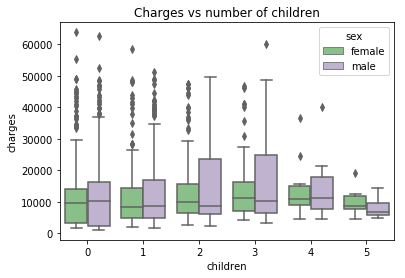

In [116]:
sea.boxplot(x="children", y='charges', hue='sex',data=data, palette= 'Accent')
plt.title('Charges vs number of children')

Also, as expected parents who smoke have more medical expenses, as seen in the boxplot below.

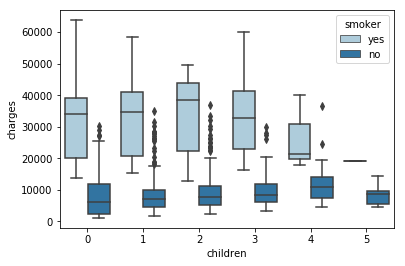

In [120]:
sea.boxplot(x="children", y='charges', hue='smoker',data=data , palette= 'Paired')

Here, I figure out mean and median charges for parents with different number of kids. Mean charges for 5 kids parents is less 
while median charges for both 1 kid and 5 kids parents are low.

In [121]:
data_grouped2=data.groupby('children').agg({'charges':'sum','sex':'count'})
#data_grouped['mean_charges']= data_grouped['charges']/data_grouped['sex']
data_grouped2['mean_charges2']=data_grouped2['charges']/data_grouped2['sex']
data_grouped2['median_charges']=data.groupby('children')['charges'].median()
data_grouped2

,charges,sex,mean_charges2,median_charges
children,,,,
0,7.098070e+06,574,12365.975602,9856.95190
1,4.124900e+06,324,12731.171832,8483.87015
2,3.617655e+06,240,15073.563734,9264.97915
3,2.410785e+06,157,15355.318367,10600.54830
4,3.462664e+05,25,13850.656311,11033.66170
5,1.581486e+05,18,8786.035247,8589.56505


In [ ]:
I am curious about the single line obtained for the 5 kids parent obtained in the previous boxplot for smoking/non-smoking  
parents vs charges. To confirm this observation as well as to check how the data looks like for this plot, I made the following
table.

In [122]:
data_grouped3=data.groupby(['children','sex','smoker']).agg({'sex':'count', 'charges':'sum'})
data_grouped3['mean_charges2']=data_grouped3['charges']/data_grouped3['sex']
data_grouped3

sex       charges  mean_charges2
children sex    smoker                                  
0        female no      236  1.814443e+06    7688.318863
                yes      53  1.626308e+06   30685.059887
         male   no      223  1.679370e+06    7530.806677
                yes      62  1.977949e+06   31902.398075
1        female no      133  1.164889e+06    8758.560884
                yes      25  7.566063e+05   30264.253915
         male   no      130  1.018829e+06    7837.147396
                yes      36  1.184576e+06   32904.876848
2        female no       97  9.624124e+05    9921.777645
                yes      22  6.966043e+05   31663.833195
         male   no       88  7.938099e+05    9020.567024
                yes      33  1.164829e+06   35297.837461
3        female no       63  6.381091e+05   10128.716357
                yes      14  4.295425e+05   30681.604257
         male   no       55  4.964042e+05    9025.530139
                yes      25  8.467292e+05   33869.169434
4        female no       11  1.533144e+05   13937.674562
         male   no       11  1.133552e+05   10305.014255
                yes       3  7.959683e+04   26532.276933
5        female no        7  5.980879e+04    8544.113050
                yes       1  1.902326e+04   19023.260000
         male   no       10  7.931658e+04    7931.658310

One feature that have not been yet looked at is -'Region'. I check if this has any influence on the charges. There are slightly more charges for people living in southeast region compared to the rest (as shown in the violoin plots below) .

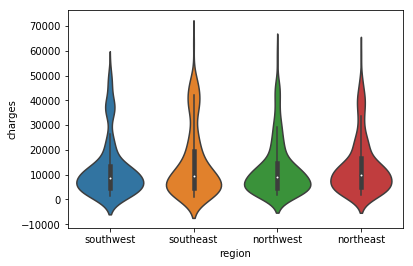

In [124]:
sea.violinplot(x="region", y='charges', data=data)

For smoker and non-smoker groups in different regions, southeast agin shows higher charges.

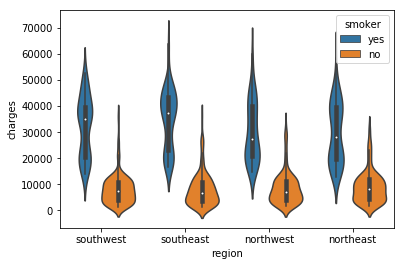

In [126]:
sea.violinplot(x="region", y='charges', hue="smoker", data=data)

To check how the data looks like when grouped by regions, I prepared the following tables. Confirming that mean charges for southeast are slightly higher than the other regions

In [127]:
data_grouped4=data.groupby('region').agg({'charges':'sum','sex':'count'})
data_grouped4['mean_charges3']=data_grouped4['charges']/data_grouped4['sex']
data_grouped4

,charges,sex,mean_charges3
region,,,
northeast,4.343669e+06,324,13406.384516
northwest,4.035712e+06,325,12417.575374
southeast,5.363690e+06,364,14735.411438
southwest,4.012755e+06,325,12346.937377


In [128]:
data_grouped5=data.groupby(['region','smoker']).agg({'sex':'count', 'charges':'sum'})
data_grouped5['mean_charges']=data_grouped5['charges']/data_grouped5['sex']
data_grouped5

sex       charges  mean_charges
region    smoker                                 
northeast no      257  2.355542e+06   9165.531672
          yes      67  1.988127e+06  29673.536473
northwest no      267  2.284576e+06   8556.463715
          yes      58  1.751136e+06  30192.003182
southeast no      273  2.192795e+06   8032.216309
          yes      91  3.170895e+06  34844.996824
southwest no      267  2.141149e+06   8019.284513
          yes      58  1.871606e+06  32269.063494

Predictive modelling
Before working on our model, we will need to do some data preprocessing. For that lets check which features are categorical. Looking at the dtypes of the features (as done below), we find that we have 3 out of 7 features that have 'object' dtype. These are - sex, smoker and region. If we want to use them for predictive modelling then these need to be encoded . For features that have just two values like in case of smoker and sex, we use Label Encoder and for region we use one hot encoding .One hot encoding is better than label encoding when we have more than two values for any categorical feature. Below, you can see that I have encoded these 3 variables and checked the results

In [129]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [130]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data['sex'].drop_duplicates())
data['sex']=encoder.transform(data['sex'])
encoder.fit(data['smoker'].drop_duplicates())
data['smoker']=encoder.transform(data['smoker'])
data1=pd.get_dummies(data['region'], prefix='region')
data= pd.concat([data,data1], axis=1).drop(['region'],axis=1)
print(data.head(2))
print(data.dtypes)

   age  sex    bmi  children  smoker     charges  region_northeast  \
0   19    0  27.90         0       1  16884.9240                 0   
1   18    1  33.77         1       0   1725.5523                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


In [131]:
##linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y= data['charges']
X = data.drop(['charges'], axis=1)
lin_reg=LinearRegression()
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
lin_reg.fit(train_X,train_y)
pred_y=lin_reg.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE: %f" % (rmse))

RMSE: 6168.155294


Next, we move to XGBoost which shows lower RMSE compared to the previous model. Also, we find the important features using plot_importance

RMSE: 4793.130008


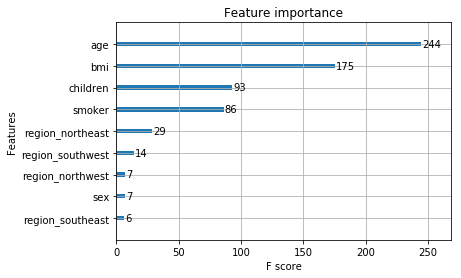

In [141]:
## XGBoost 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import numpy as np

y= data['charges']
X = data.drop(['charges'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))
plot_importance(model_x)

Further, I remove the following not-very important features- 'sex', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', and check the RMSE. RMSE reduces to 4781 from previous value of 4793 suggesting that age, bmi, smoker and children are the important features

In [142]:
y= data['charges']
X = data.drop(['charges','sex','region_northeast','region_northwest','region_southeast','region_southwest'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
train_X = pd.DataFrame(data=train_X, columns=X.columns)
test_X = pd.DataFrame(data=test_X, columns=X.columns)

model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)

model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)

rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4781.648666


Additionally, if I drop 'children' feature, the RMSE reduces further. Its worth mentioning here that if I drop any of the other three features, RMSE increases substantially suggesting that they are the key predictors of charges.

In [145]:
y= data['charges']
X = data.drop(['charges','sex','region_northeast','region_northwest','region_southeast','region_southwest','children'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25, random_state=21)
model_x = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model_x.fit(train_X, train_y, early_stopping_rounds=5,eval_set=[(test_X, test_y)], verbose=False)
predictions = model_x.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4744.912713


Conclusion
The key predictors of medical charges (obtained from this dataset) are age, bmi and smoking. Although, we do not have control on our aging, but we can try taking care of the other two. I hope you enjoyed this dataset exploration!

Thanks for reading. Any suggestion please tell me.